# Прогназирование оттока клиентов.
<br>
Описание работы:
<br>
&nbsp;&nbsp;&nbsp;&nbsp; Предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят).Работа включает в себя следующие пункты: 
1. Описание данных. 
2. Исследование зависимостей и формулирование гипотез. 
3. Построение моделей для прогнозирования оттока на основе проверенных гипотез и выявленных взаимосвязей. 
4. Сравнение качества полученных моделей. 
<br><br>

## Codebook
`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
# Информация по DataFrame
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


(5986, 22)

Пропущенных данных нет.

Первым этапом уберем столбцы, которые не предоставляют для нас полезной информации. Unnamed: 0, customerID, TotalCharges. TotalCharges убираем тоже т.к 
является результатом перемножения имеющихся двух столбцов (размер месячной оплаты на длительность использования)

In [ ]:
df_drop = df.drop(['Unnamed: 0', 'customerID','TotalCharges'], axis = 1)

Для обучения моделей, преобразуем данные к числовому виду.

In [ ]:
df_drop['gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

a_list = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
df_drop[a_list] = df_drop[a_list].replace({'Yes':'1', 'No':'0'}).astype(int)

b_list = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
           'StreamingTV','StreamingMovies']

df_drop[b_list] = df_drop[b_list].replace({'Yes':'1', 'No':'0', 'No phone service':'2', 'No internet service':'2'}).astype(int)

df_drop['Contract'] = df_drop['Contract'].replace({'Month-to-month':'0','One year':'1','Two year':'2'}).astype(int)

df_drop['InternetService'] = df_drop['InternetService'].replace({'No':'0','DSL':'1','Fiber optic':'2'}).astype(int)

df_drop['PaymentMethod'] = df_drop['PaymentMethod'].replace({'Electronic check':'0','Mailed check':'1',
                                                             'Bank transfer (automatic)':'2','Credit card (automatic)':'3'}).astype(int)

Для столбцов tenure и MonthlyCharges сделаем статистику, чтобы разбить значения по группам. Разбиение групп произведем следующим образом:<br>
Первая группа значения до 25 процентиля<br>
Вторая группа значения от 25 до 75 процентиля <br>
Третья группа значения после 75 процентиля <br>


In [ ]:
df_drop['tenure'].describe()

count    5986.000000
mean       32.468760
std        24.516391
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [ ]:
df_drop['MonthlyCharges'].describe()

count    5986.000000
mean       64.802213
std        30.114702
min        18.250000
25%        35.650000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [ ]:
df_drop['tenure'] = df_drop.tenure.apply(lambda x: 0 if x < 9 else (1 if 9<=x<56 else 2))
df_drop['MonthlyCharges'] = df_drop.MonthlyCharges.apply(lambda x: 0 if x < 36 else (1 if 36<=x<90 else 2))

In [ ]:
df_drop.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,1,2,1,1,0,2,2,2,2,2,2,2,0,3,0,0
1,1,0,0,0,1,1,0,2,0,1,1,0,1,0,0,1,3,1,0
2,1,1,1,0,1,1,1,2,0,0,0,0,0,0,0,1,2,1,1
3,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0
4,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0


# 2. Исследование зависимостей и формулирование гипотез

Для поиска корреляционных связей построим с помощью библиотеки seaborn тепловую карту.

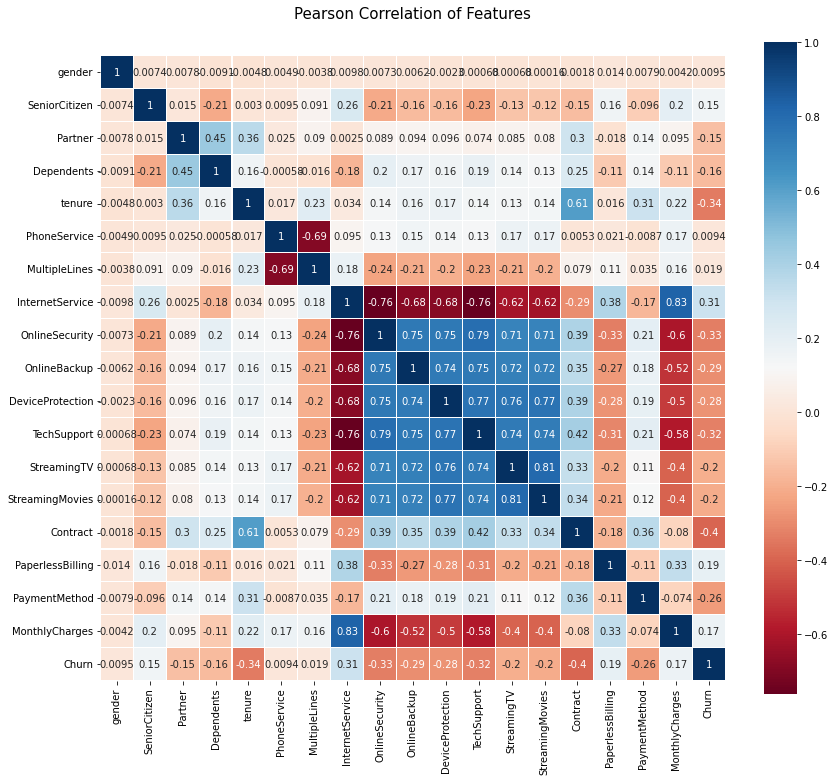

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_drop.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Предсказывая отток клиентов (Churn) наибольшее значение корреляционной связи видим у фичи InternetService (0,31).Также заметны положительные зависимости у SeniorCitizen, PaperlessBilling, MonthlyCharges.

Подробнее рассмотрим самую сильную зависимость между сервисным оператором и оттоком клиентов.

In [ ]:
print(df_drop.groupby('InternetService')['Churn'].sum())
print(df_drop.groupby('InternetService')['Churn'].count())

InternetService
0      99
1     397
2    1091
Name: Churn, dtype: int64
InternetService
0    1291
1    2068
2    2627
Name: Churn, dtype: int64


При анализе выявлено, что у оператора Fiber optic сильной отток клиента. Из 2627 пользователей ушло 1091 ( почти половина от общего числа). 

Анализируя фичи  SeniorCitizen, PaperlessBilling, MonthlyCharges, выберем размер месячной оплаты и ожидаем сильную связь с оттоком из-за ее размера (MonthlyCharges).



In [ ]:
print(df.groupby('Churn')['MonthlyCharges'].describe())

        count       mean        std    min     25%    50%   75%     max
Churn                                                                  
No     4399.0  61.424506  31.086101  18.25  25.125  64.75  88.7  118.75
Yes    1587.0  74.164871  24.965002  18.85  55.675  79.50  94.4  118.35


Как и ожидалось у клинетов из оттока значение 25 процентиля в два раза больше, чем у оставшихся клиентов. Посмотрим на значения месячной оплаты по компаниям.

In [ ]:
pd.set_option('display.max_columns', 500)
print(df.groupby(['InternetService','Churn'])['MonthlyCharges'].describe())

                        count       mean        std    min      25%    50%  \
InternetService Churn                                                        
DSL             No     1671.0  60.296469  16.281463  24.15  49.6250  59.70   
                Yes     397.0  48.885516  13.594409  23.45  41.1500  49.15   
Fiber optic     No     1536.0  93.908952  12.624641  68.60  84.4375  94.75   
                Yes    1091.0  88.239413  12.093636  67.75  78.4500  87.40   
No              No     1192.0  21.146686   2.222944  18.25  19.7000  20.15   
                Yes      99.0  20.433333   1.540259  18.85  19.6500  20.00   

                            75%     max  
InternetService Churn                    
DSL             No      72.9500   94.80  
                Yes     55.6500   85.35  
Fiber optic     No     104.4125  118.75  
                Yes     98.7500  118.35  
No              No      21.0500   26.90  
                Yes     20.4500   25.90  


Анализируя полученные данные и обобщая результаты, можно сказать, что отток клиентов сильно связан с выбором интернет провайдера InternetService. Также на отток влияет размер месячной абонентной платы MonthlyCharges. Интернет провайдер FiberOptic имеет наибольшое значение ушедших клиентов, связываю с тем что размеры абонентной платы у этого оператора выше в 2 раза чем у конкурентов. Также смотря на значения 25 процентиля у ушедних клиентов, можно сделать вывод что клиентам предлагали непосильный месячный платеж.

Для прогназирования оттока клиентов выберем алгоритмы классификации и сравнивать между собой будет по метрике AUC-ROC, т.к датасет несбалансированный, будем смотреть как алгоритм работает внутри одного класса.

# 3. Построение моделей для прогнозирования оттока

В качестве базовых алгоритмов возьмем kNN, LogisticRegression, DesisionTreeClassifier, GradientBoostingClassifier, RandomForestClassifier и SupportVectorClassification.<br>
Также реализуем stacking, в качестве мета-алгоритма будем использовать XGBoost.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

target = df_drop['Churn']
data = df_drop.drop('Churn', axis=1)

# Датасет несбалансированный параметр, поэтому задаем параметр stratify
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42, test_size = 0.7, stratify = target)

Найдем лучшие параметры для моделей, для этого зададим диапазоны параметров для базовых методов.

In [ ]:
knn_params = {'n_neighbors' : np.arange(1, 10, 1)}

dtc_params = {'max_depth': range(1, 8), 
              'max_features': range(1, 13)}

gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2)}

lr_params = {'C': np.arange(0.5, 1, 0.1)}

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle = True)

*Для логистической регрессии задаем параметр весов*

In [ ]:
class_weight = {0: target[target == 1].count() / target.count(),
                1: target[target == 0].count() / target.count()}  # для LogisticRegression

*С помощью GreadSearchCV настроенную на метрику roc_auc и 5-кратной кросс-валидации выведем лучшее сочетание параметров для каждого из алгоритмов.*

In [ ]:
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid=knn_params, scoring='roc_auc', cv=skf)
dtc = DecisionTreeClassifier(random_state=17)
dtc_grid = GridSearchCV(dtc, param_grid=dtc_params, scoring='roc_auc', cv=skf)
gbc = GradientBoostingClassifier(random_state=17)
gbc_grid = GridSearchCV(gbc, param_grid=gbc_params, scoring='roc_auc', cv=skf)
rfc = RandomForestClassifier(random_state=17)
rfc_grid = GridSearchCV(rfc, param_grid=rfc_params, scoring='roc_auc', cv=skf)
svc = SVC(random_state=17)
svc_grid = GridSearchCV(svc, param_grid=svc_params, scoring='roc_auc', cv=skf)
lr = LogisticRegression(random_state=17, class_weight=class_weight)
lr_grid = GridSearchCV(lr, param_grid=lr_params, scoring='roc_auc', cv=skf)

In [ ]:
knn_model = knn_grid.fit(X_train, y_train)
print(f'Лучшее сочетание параметров для KNeighborsClassifier: {knn_model.best_params_}\n')
dtc_model = dtc_grid.fit(X_train, y_train)
print(f'Лучшее сочетание параметров для DecisionTreeClassifier: {dtc_model.best_params_}\n')
gbc_model = gbc_grid.fit(X_train, y_train)
print(f'Лучшее сочетание параметров для GradientBoostingClassifier: {gbc_model.best_params_}\n')
rfc_model = rfc_grid.fit(X_train, y_train)
print(f'Лучшее сочетание параметров для RandomForestClassifier: {rfc_model.best_params_}\n')
svc_model = svc_grid.fit(X_train, y_train)
print(f'Лучшее сочетание параметров для SVC: {svc_model.best_params_}\n')
lr_model = lr_grid.fit(X_train, y_train)
print(f'Лучшее сочетание параметров для LogisticRegression: {lr_model.best_params_}\n')

Лучшее сочетание параметров для KNeighborsClassifier: {'n_neighbors': 9}

Лучшее сочетание параметров для DecisionTreeClassifier: {'max_depth': 5, 'max_features': 11}

Лучшее сочетание параметров для GradientBoostingClassifier: {'learning_rate': 0.1}

Лучшее сочетание параметров для RandomForestClassifier: {'min_samples_leaf': 4, 'n_estimators': 50}

Лучшее сочетание параметров для SVC: {'C': 0.1, 'kernel': 'linear'}

Лучшее сочетание параметров для LogisticRegression: {'C': 0.5}



Получим метрику качества auc_roc для все алгоритмов с найденными оптимальными параметрами.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print('Метод: "KNeighborsClassifier"')
print(f'Метрика качества: "AUC": {roc_auc_score(y_test, knn_pred)}\n')

dtc_model = DecisionTreeClassifier(max_depth=5, max_features=11, random_state=17).fit(X_train, y_train)
dtc_pred = dtc_model.predict(X_test)
print('Метод: "DecisionTreeClassifier"')
print(f'Метрика качества: "AUC": {roc_auc_score(y_test, dtc_pred)}\n')

gbc_model = GradientBoostingClassifier(learning_rate=0.1, random_state=17).fit(X_train, y_train)
gbc_pred = gbc_model.predict(X_test)
print('Метод: "GradientBoostingClassifier"')
print(f'Метрика качества: "AUC": {roc_auc_score(y_test, gbc_pred)}\n')

rfc_model = RandomForestClassifier(min_samples_leaf=4, n_estimators=50, random_state=17).fit(X_train, y_train)
rfc_pred = rfc_model.predict(X_test)
print('Метод: "RandomForestClassifier"')
print(f'Метрика качества: "AUC": {roc_auc_score(y_test, rfc_pred)}\n')

svc_model = SVC(C=0.1, kernel='linear', random_state=17).fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print('Метод: "SupportVectorClassification"')
print(f'Метрика качества: "AUC": {roc_auc_score(y_test, svc_pred)}\n')

lr_model = LogisticRegression(C=0.5, random_state=17).fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print('Метод: "LogisticRegression"')
print(f'Метрика качества: "AUC": {roc_auc_score(y_test, lr_pred)}\n')

Метод: "KNeighborsClassifier"
Метрика качества: "AUC": 0.6915005786292915

Метод: "DecisionTreeClassifier"
Метрика качества: "AUC": 0.6991513437057991

Метод: "GradientBoostingClassifier"
Метрика качества: "AUC": 0.7087453388195962

Метод: "RandomForestClassifier"
Метрика качества: "AUC": 0.6820174874630321

Метод: "SupportVectorClassification"
Метрика качества: "AUC": 0.7002684196991127

Метод: "LogisticRegression"
Метрика качества: "AUC": 0.7057428957181433



*Реализуем метод Stacking с используемыми алгоритмами.

In [ ]:
train, valid, train_true, valid_true = train_test_split(X_train, y_train,train_size=0.5,random_state=17)

In [ ]:
knn_base = KNeighborsClassifier(n_neighbors=9).fit(train, train_true)
knn_base_pred = knn_base.predict(valid)


dtc_base = DecisionTreeClassifier(max_depth=5, max_features=11, random_state=17).fit(train, train_true)
dtc_base_pred = dtc_base.predict(valid)


gbc_base = GradientBoostingClassifier(learning_rate=0.1, random_state=17).fit(train, train_true)
gbc_base_pred = gbc_base.predict(valid)


rfc_base = RandomForestClassifier(min_samples_leaf=4, n_estimators=60, random_state=17).fit(train, train_true)
rfc_base_pred = rfc_base.predict(valid)


svc_base = SVC(C=0.1, kernel='linear', random_state=17).fit(train, train_true)
svc_base_pred = svc_base.predict(valid)


lr_base = LogisticRegression(C=0.5, random_state=17).fit(train, train_true)
lr_base_pred = lr_base.predict(valid)

Матрицу метапризнаков заполним из предсказаний, полученных на первой части валидационных данных базовыми алгоритмами.

In [ ]:
meta_feature_stacking = [knn_base_pred, dtc_base_pred, gbc_base_pred, rfc_base_pred, svc_base_pred, lr_base_pred]
meta_mtrx_stacking = np.empty((valid.shape[0], len(meta_feature_stacking)))
for n, feature in enumerate(meta_feature_stacking):
    meta_mtrx_stacking[:, n] = feature

С помощью GridSearchCV и указанных ниже параметров настроим мета-алгоритм на мета-признаках (используя 5-кратную валидацию при определении алгоритма).

In [ ]:
xgb_params = {'n_estimators': range(10, 100, 5),
              'eta': np.arange(0.1, 1., .1),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)}

scale_pos_weight = target[target == 0].count() / target.count()  # параметр весов

meta_stacking = XGBClassifier(random_state=17, cv=5)
meta_grid_stacking = GridSearchCV(meta_stacking, param_grid=xgb_params, cv=skf)
meta_grid_model_stacking = meta_grid_stacking.fit(meta_mtrx_stacking, valid_true)
print(f'Лучшее сочетание параметров для XGBClassifier: {meta_grid_model_stacking.best_params_}')

Лучшее сочетание параметров для XGBClassifier: {'eta': 0.1, 'min_child_weight': 2, 'n_estimators': 10, 'subsample': 0.7000000000000001}


Используем лучшие параметры для обучения модели

In [ ]:
meta_stacking = XGBClassifier(random_state=17, eta=0.1, min_child_weight=2, n_estimators=10, subsample=0.7000000000000001, cv=5)
meta_model = meta_stacking.fit(meta_mtrx_stacking, valid_true)

models = [knn_base, dtc_base, gbc_base, rfc_base, svc_base, lr_base]
meta_mtrx_test = np.empty((X_test.shape[0], len(models)))

for n, model in enumerate(models):
    meta_mtrx_test[:, n] = model.predict(X_test)
    
meta_predict = meta_model.predict(meta_mtrx_test)

Выведем метрику качества модели после stacking

In [ ]:
print('Метод: "Stacking"')
print(f'Метрика качества: "AUC": {roc_auc_score(y_test, meta_predict)}')

Метод: "Stacking"
Метрика качества: "AUC": 0.6944708756589945


# 4. Сравнение качества моделей 

Для прогназирование оттока клиентов в рамках данной работы лучше всего себя показала модель градиентного бустинга деревьев (GradientBoostingClassifier) со значением метрики:<br>
AUC-ROC GradientBoostingClassifier - 0,7087.<br>
У моделей метода опорных векторов (SVC) и логистической регрессии (LogisticRegression) метрика качества AUC-ROC получилась соизмеримой с моделью градиентного бустинга деревьев.<br>
AUC-ROC SVC - 0,7002<br>
AUC-ROC LogisticRegression - 0,7057